In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df['Class'].value_counts()


,count
Class,
0.0,23769
1.0,88


: Separate Features and Target

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']


Train–Test Split (Stratified)

In [7]:
y_filtered = y.dropna()
X_filtered = X.loc[y_filtered.index]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

Train a Baseline Model (Logistic Regression)

In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.74      0.78      0.76        18

    accuracy                           1.00      4772
   macro avg       0.87      0.89      0.88      4772
weighted avg       1.00      1.00      1.00      4772



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Random Forest Model

In [9]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Make Predictions

In [10]:
y_pred_rf = rf.predict(X_test)


Evaluate Model

In [11]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.93      0.78      0.85        18

    accuracy                           1.00      4772
   macro avg       0.97      0.89      0.92      4772
weighted avg       1.00      1.00      1.00      4772

[[4753    1]
 [   4   14]]


Feature Importance

In [12]:
importances = rf.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df.head(10)


,Feature,Importance
14,V14,0.184963
4,V4,0.131550
3,V3,0.131385
12,V12,0.087095
10,V10,0.085614
17,V17,0.078485
11,V11,0.060724
2,V2,0.037299
9,V9,0.032619
27,V27,0.031444


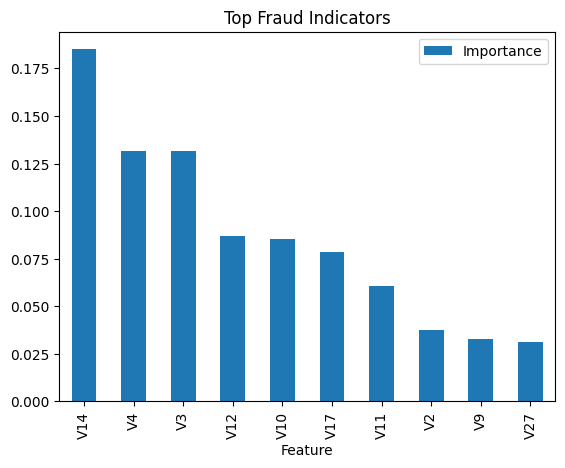

In [13]:
feature_df.head(10).plot(
    x='Feature', y='Importance', kind='bar', title='Top Fraud Indicators'
)
plt.show()
